In [1]:
from datetime import datetime

import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [2]:
cars = pd.read_csv('autoru_cars.csv')

display(cars.head(5))
cars.info()

,Unnamed: 0,test,style,body,color,fuel,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,vehicle_title,description,features,ownership,price
0,0,0,525E,седан,золотистый,Бензин,Unknown,4,1986,механическая,2.7,125,220000.0,задний,Левый,Не требует ремонта,2,Оригинал,Unknown,Unknown,NaN,50000.0
1,1,0,525i,седан,серый,Бензин,Unknown,4,1988,механическая,2.5,170,300000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,Unknown,NaN,70000.0
2,2,0,318i,седан,зелёный,Бензин,Unknown,5,1994,механическая,1.8,115,350000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,Unknown,9 месяцев,70000.0
3,3,0,520i,седан,чёрный,Бензин,Unknown,4,1992,механическая,2.0,150,100000.0,задний,Левый,Не требует ремонта,3,Оригинал,Unknown,Unknown,NaN,70000.0
4,4,0,520i,седан,чёрный,Бензин,Unknown,4,1992,механическая,2.0,150,250000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,"['Электростеклоподъёмники задние', 'Электросте...",5 месяцев,75000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034 entries, 0 to 6033
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6034 non-null   int64  
 1   test                 6034 non-null   int64  
 2   style                6034 non-null   object 
 3   body                 6034 non-null   object 
 4   color                6034 non-null   object 
 5   fuel                 6034 non-null   object 
 6   model_date           6034 non-null   object 
 7   doors                6034 non-null   int64  
 8   production_date      6034 non-null   int64  
 9   transmission         6034 non-null   object 
 10  engine_displacement  6034 non-null   float64
 11  engine_power         6034 non-null   int64  
 12  mileage              6034 non-null   float64
 13  drive_type           6034 non-null   object 
 14  wheel                6034 non-null   object 
 15  condition            6034 non-null   o

In [3]:
def column_stats(column):
    
    if column.dtype == 'int64' or column.dtype == 'float64':
        
        display(column.describe())
        
        plt.figure(figsize=(8,5))
        column.hist(bins=column.nunique())     
    else:
        display(column.describe())
        display(column.value_counts())      

In [4]:
# def add_dummies(df, column, rename_params):
    
#     # Создаем дамми переменные
#     temp_dummies = pd.get_dummies(df[column])
    
#     # Переименовываем названия колонок
#     temp_dummies.rename(columns = rename_params, inplace=True)
    
#     # Добавляем полученные дамми к нашему датасету, удалив при этом старую колонку
#     df = pd.concat([df, temp_dummies], axis=1)
#     df = df.drop([column], axis=1)
    
#     return df

In [5]:
def onehot_encode(data_frame, column, rename_params={}, rename=False):
    
    onehot_encoder = OneHotEncoder()
    
    # Кодируем переменные
    enc = onehot_encoder.fit_transform(column).toarray()
    
    # Создаем временный датафрейм
    temp_df = pd.DataFrame(enc, columns=onehot_encoder.categories_[0])
    
    if rename:
        # Переименовываем названия колонок
        temp_df.rename(columns = rename_params, inplace=True)

    # Добавляем полученный датафрейм к нашему датафрейму
    data_frame = pd.concat([data_frame, temp_df], axis=1)
    
    return data_frame

# style

In [6]:
column_stats(cars['style'])

count     6034
unique     143
top        30d
freq       484
Name: style, dtype: object

30d             484
320i            380
520i            373
35i             347
20d             292
520d            265
116i            201
3.0i            188
318i            188
20i             174
528i            156
320d            148
525i            146
530d            119
30i             119
523i            116
40d             103
18i             100
3.0d             91
3.0si            86
28i              84
50i              78
118i             77
325i             71
530i             68
750Li            67
316i             66
48i              66
4.4i             62
M50d             60
35d              57
25i              55
525d             50
740Li            48
730d             47
535i             46
25d              44
325xi            39
730Ld            38
328i             36
640i             31
650i             31
4.8i             28
740d             26
330i             25
530xi            24
750i             23
640d             23
40i              22
420d             22


# body

In [7]:
column_stats(cars['body'])

count            6034
unique             10
top       внедорожник
freq             2623
Name: body, dtype: object

внедорожник     2623
седан           2582
хэтчбек          332
купе             239
лифтбек          119
универсал         88
кабриолет         34
родстер            8
компактвэн         6
купе-хардтоп       3
Name: body, dtype: int64

In [8]:
params = {'внедорожник': 'offroad',
          'седан': 'sedan',
          'хэтчбек': 'hatchback',
          'купе': 'coupe',
          'лифтбек': 'liftback',
          'универсал': 'estate',
          'кабриолет': 'cabriolet',
          'родстер': 'roadster',
          'компактвэн': 'compact',
          'купе-хардтоп': 'coupe_hard'}

cars = onehot_encode(cars, cars[['body']], params, rename=True)
cars.drop(columns=['body'], inplace=True)

# color

In [9]:
column_stats(cars['color'])

count       6034
unique        16
top       чёрный
freq        2379
Name: color, dtype: object

чёрный         2379
белый          1035
синий           763
серый           669
серебристый     425
коричневый      254
красный         177
зелёный         106
бежевый          57
голубой          49
пурпурный        36
оранжевый        31
золотистый       29
фиолетовый       20
жёлтый            3
розовый           1
Name: color, dtype: int64

Резделим цвет на две категории:
    
    1) Белыйб, черный, серый, серебристый, синий
    2) Остальные цвета 

In [10]:
cars['color'] = cars['color'].apply(lambda x: 'main_color' if x in ['чёрный', 'белый', 'синий', 'серый', 'серебристый'] else 'other_color')

In [11]:
cars = onehot_encode(cars, cars[['color']])
cars.drop(columns=['color'], inplace=True)

# fuel

In [12]:
column_stats(cars['fuel'])

count        6034
unique          5
top        Бензин
freq         3993
Name: fuel, dtype: object

 Бензин                                3993
 Дизель                                2004
 Бензин, газобаллонное оборудование      21
 Гибрид                                  14
 Электро                                  2
Name: fuel, dtype: int64

In [13]:
params={' Бензин': 'gasoline',
        ' Дизель': 'diesel',
        ' Бензин, газобаллонное оборудование': 'gasoline_gas',
        ' Гибрид': 'hybrid',
        ' Электро': 'electro'}

cars = onehot_encode(cars, cars[['fuel']], params, rename=True)
cars.drop(columns=['fuel'], inplace=True)

# doors

count    6034.000000
mean        4.425920
std         0.741087
min         2.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: doors, dtype: float64

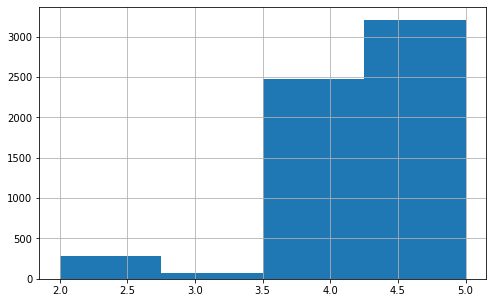

In [14]:
column_stats(cars['doors'])

# production_date

count    6034.000000
mean     2009.891448
std         6.467349
min      1975.000000
25%      2007.000000
50%      2011.000000
75%      2014.000000
max      2020.000000
Name: production_date, dtype: float64

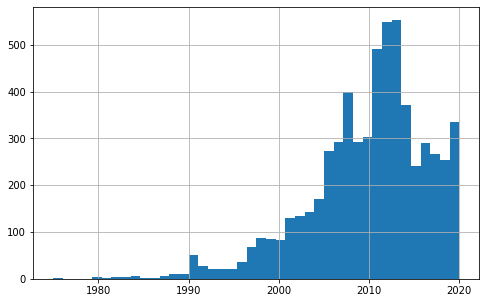

In [15]:
column_stats(cars['production_date'])

In [16]:
cars['years_in_use'] = cars['production_date'].apply(lambda x: datetime.now().year-x)

In [17]:
cars

,Unnamed: 0,test,style,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,vehicle_title,description,features,ownership,price,offroad,cabriolet,compact,coupe,coupe_hard,liftback,roadster,sedan,estate,hatchback,main_color,other_color,gasoline,gasoline_gas,hybrid,diesel,electro,years_in_use
0,0,0,525E,Unknown,4,1986,механическая,2.7,125,220000.0,задний,Левый,Не требует ремонта,2,Оригинал,Unknown,Unknown,NaN,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,34
1,1,0,525i,Unknown,4,1988,механическая,2.5,170,300000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,Unknown,NaN,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,32
2,2,0,318i,Unknown,5,1994,механическая,1.8,115,350000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,Unknown,9 месяцев,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,26
3,3,0,520i,Unknown,4,1992,механическая,2.0,150,100000.0,задний,Левый,Не требует ремонта,3,Оригинал,Unknown,Unknown,NaN,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,28
4,4,0,520i,Unknown,4,1992,механическая,2.0,150,250000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,"['Электростеклоподъёмники задние', 'Электросте...",5 месяцев,75000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,6029,0,M50i,Unknown,5,2020,автоматическая,4.4,530,120.0,полный,Левый,Не требует ремонта,1,Оригинал,Unknown,"['Круиз-контроль', 'Мультифункциональное рулев...",5 месяцев,10499999.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6030,6030,0,1.5hyb,Unknown,2,2019,автоматическая,1.5,231,720.0,полный,Левый,Не требует ремонта,1,Оригинал,Unknown,"['Круиз-контроль', 'Система «старт-стоп»', 'Пр...",NaN,10500888.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6031,6031,0,M50d,Unknown,5,2020,автоматическая,3.0,400,18.0,полный,Левый,Не требует ремонта,1,Оригинал,Unknown,"['Круиз-контроль', 'Мультифункциональное рулев...",NaN,11093198.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6032,6032,0,750Ld,Unknown,4,2019,автоматическая,3.0,400,31.0,полный,Левый,Не требует ремонта,1,Оригинал,Unknown,"['Защита картера', 'Обвес кузова', 'Алькантара...",NaN,12460000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# transmission

In [18]:
column_stats(cars['transmission'])

count               6034
unique                 3
top       автоматическая
freq                5585
Name: transmission, dtype: object

автоматическая      5585
механическая         430
роботизированная      19
Name: transmission, dtype: int64

In [19]:
params={'автоматическая': 'AT',
        'механическая': 'MT',
        'роботизированная': 'AM'}

cars = onehot_encode(cars, cars[['transmission']], params, rename=True)
cars.drop(columns=['transmission'], inplace=True)

# engine_displacement

count    6034.000000
mean        2.664402
std         3.141855
min         0.700000
25%         2.000000
50%         2.500000
75%         3.000000
max       170.000000
Name: engine_displacement, dtype: float64

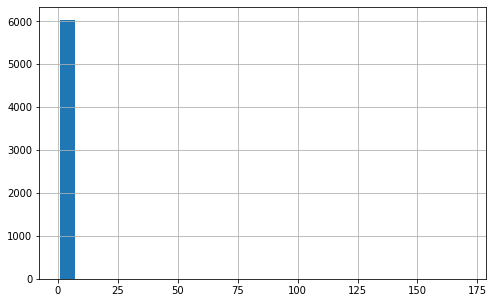

In [20]:
column_stats(cars['engine_displacement'])

# engine_power

count    6034.000000
mean      228.336924
std        72.691312
min        75.000000
25%       184.000000
50%       218.000000
75%       265.000000
max       610.000000
Name: engine_power, dtype: float64

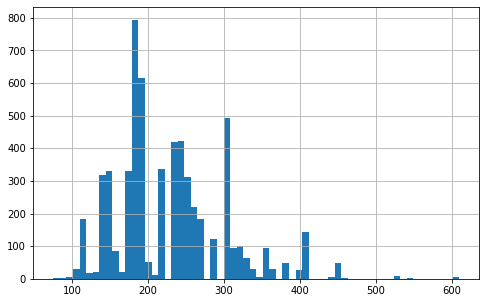

In [21]:
column_stats(cars['engine_power'])

In [22]:
def tax(data):
    
    if data<=100:
        return float(data*12)
    
    elif data>100 and data<=125:
        return float(data*25)
    
    elif data>125 and data<=150:
        return float(data*35)
    
    elif data>150 and data<=175:
        return float(data*45)
    
    elif data>175 and data<=200:
        return float(data*50)
    
    elif data>200 and data<=225:
        return float(data*65)
    
    elif data>225 and data<=250:
        return float(data*75)
        
    elif data>250:
        return float(data*150)
    
cars['tax'] = cars['engine_power'].apply(tax)        

In [23]:
def tax_per_horse(data):
    
    if data<=100:
        return 12
    
    elif data>100 and data<=125:
        return 25
    
    elif data>125 and data<=150:
        return 35
    
    elif data>150 and data<=175:
        return 45
    
    elif data>175 and data<=200:
        return 50
    
    elif data>200 and data<=225:
        return 65
    
    elif data>225 and data<=250:
        return 75
        
    elif data>250:
        return 150
    
cars['tax_per_horse'] = cars['engine_power'].apply(tax_per_horse)

# mileage

count      6034.000000
mean     156151.225058
std      100870.175862
min           1.000000
25%       85000.000000
50%      140000.000000
75%      210000.000000
max      670000.000000
Name: mileage, dtype: float64

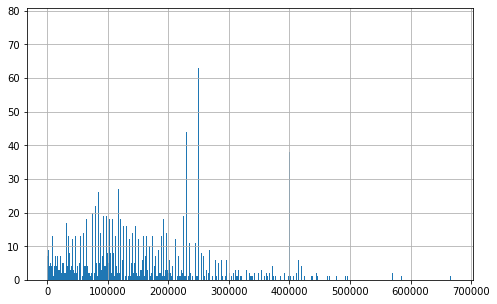

In [24]:
column_stats(cars['mileage'])

In [25]:
cars['mileage_per_day'] = cars['mileage'] / (cars['years_in_use'] * 365) 

# drive_type

In [26]:
column_stats(cars['drive_type'])

count       6034
unique         3
top       полный
freq        3509
Name: drive_type, dtype: object

полный      3509
задний      2502
передний      23
Name: drive_type, dtype: int64

In [27]:
params={'полный': 'AWD',
        'задний': 'RWD',
        'передний': 'FWD'}

cars = onehot_encode(cars, cars[['drive_type']], params, rename=True)
cars.drop(columns=['drive_type'], inplace=True)

# wheel

In [28]:
column_stats(cars['wheel'])

count      6034
unique        2
top       Левый
freq       6033
Name: wheel, dtype: object

Левый     6033
Правый       1
Name: wheel, dtype: int64

# condition

In [29]:
column_stats(cars['condition'])

count                   6034
unique                     1
top       Не требует ремонта
freq                    6034
Name: condition, dtype: object

Не требует ремонта    6034
Name: condition, dtype: int64

# owners

count    6034.000000
mean        2.250249
std         0.816509
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: owners, dtype: float64

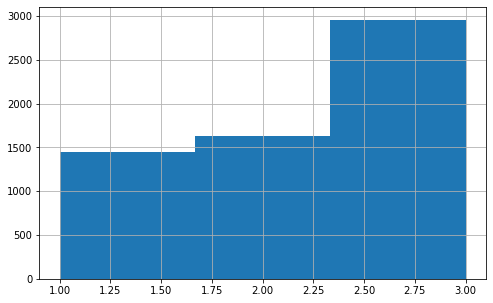

In [30]:
column_stats(cars['owners'])

# vehicle_title

In [31]:
column_stats(cars['vehicle_title'])

count         6034
unique           2
top       Оригинал
freq          5120
Name: vehicle_title, dtype: object

Оригинал    5120
Дубликат     914
Name: vehicle_title, dtype: int64

In [32]:
params={'Оригинал': 'original_passport',
        'Дубликат': 'copy_passport',}

cars = onehot_encode(cars, cars[['vehicle_title']], params, rename=True)
cars.drop(columns=['vehicle_title'], inplace=True)

# description

# features

# ownership

# price

count    6.034000e+03
mean     1.329250e+06
std      1.201937e+06
min      5.000000e+04
25%      5.800000e+05
50%      1.050000e+06
75%      1.600000e+06
max      1.269000e+07
Name: price, dtype: float64

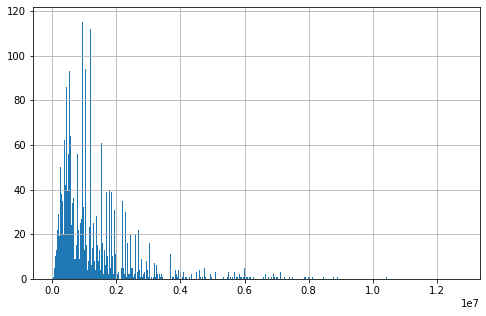

In [33]:
column_stats(cars['price'])

In [35]:
cars.to_csv('auto_ru_cars_dummies.csv', index=False)